In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"D:\5.MBAN6110 Data Science I\games.csv")

In [3]:
metadata = pd.read_json(r'D:\5.MBAN6110 Data Science I\games_metadata.json', lines=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50503 non-null  int64  
 1   title           50503 non-null  object 
 2   date_release    50503 non-null  object 
 3   win             50503 non-null  bool   
 4   mac             50503 non-null  bool   
 5   linux           50503 non-null  bool   
 6   rating          50503 non-null  object 
 7   positive_ratio  50503 non-null  int64  
 8   user_reviews    50503 non-null  int64  
 9   price_final     50503 non-null  float64
 10  price_original  50503 non-null  float64
 11  discount        50503 non-null  float64
 12  steam_deck      50503 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [5]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   app_id       50503 non-null  int64 
 1   description  50503 non-null  object
 2   tags         50503 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [6]:
df = df.merge(metadata, on='app_id')

In [7]:
df = df.drop('description', axis=1)

In [8]:
df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,tags
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True,[Action]
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50503 non-null  int64  
 1   title           50503 non-null  object 
 2   date_release    50503 non-null  object 
 3   win             50503 non-null  bool   
 4   mac             50503 non-null  bool   
 5   linux           50503 non-null  bool   
 6   rating          50503 non-null  object 
 7   positive_ratio  50503 non-null  int64  
 8   user_reviews    50503 non-null  int64  
 9   price_final     50503 non-null  float64
 10  price_original  50503 non-null  float64
 11  discount        50503 non-null  float64
 12  steam_deck      50503 non-null  bool   
 13  tags            50503 non-null  object 
dtypes: bool(4), float64(3), int64(3), object(4)
memory usage: 4.0+ MB


drop 146 rows

Check null if any

In [10]:
df.isnull().sum(axis=1).sum()

0

drop duplicate if any

In [11]:
# Drop duplicate rows
df.drop_duplicates(subset=['app_id', 'title', 'date_release', 'win', 'mac', 'linux',
                             'rating', 'positive_ratio', 'user_reviews', 'price_final',
                             'price_original', 'discount', 'steam_deck'], inplace=True)




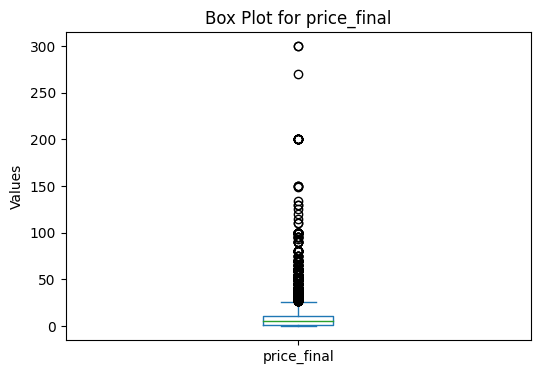

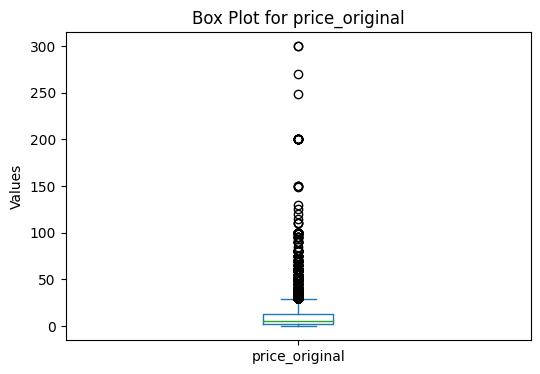

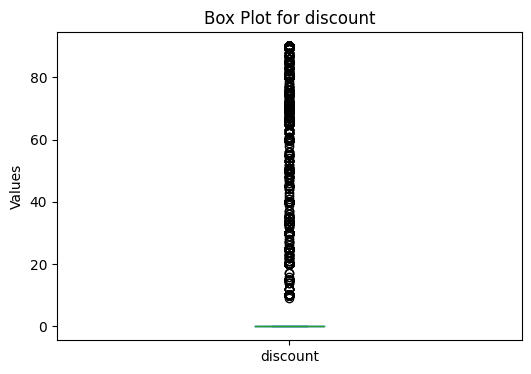

In [12]:
import matplotlib.pyplot as plt

# Iterate over columns
for column in df.columns:
    # Skip non-numeric columns
    if not df[column].dtype in [float, int]:
        continue
    
    # Create a box plot
    plt.figure(figsize=(6, 4))
    df[column].plot.box()
    
    # Set the title and labels
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Values')
    
    # Show the plot
    plt.show()


In [13]:
df = df[df['price_final'] < 29]
df = df[df['price_original'] < 30]

remove outliers.     
94% left.  

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47693 entries, 0 to 50502
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          47693 non-null  int64  
 1   title           47693 non-null  object 
 2   date_release    47693 non-null  object 
 3   win             47693 non-null  bool   
 4   mac             47693 non-null  bool   
 5   linux           47693 non-null  bool   
 6   rating          47693 non-null  object 
 7   positive_ratio  47693 non-null  int64  
 8   user_reviews    47693 non-null  int64  
 9   price_final     47693 non-null  float64
 10  price_original  47693 non-null  float64
 11  discount        47693 non-null  float64
 12  steam_deck      47693 non-null  bool   
 13  tags            47693 non-null  object 
dtypes: bool(4), float64(3), int64(3), object(4)
memory usage: 4.2+ MB


In [15]:
df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,tags
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True,[Action]
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


In [16]:
df['rating'].unique()

array(['Very Positive', 'Positive', 'Mixed', 'Mostly Positive',
       'Overwhelmingly Positive', 'Negative', 'Mostly Negative',
       'Overwhelmingly Negative', 'Very Negative'], dtype=object)

In [17]:
df.groupby('rating')[['positive_ratio','user_reviews', 'price_final','price_original','discount']].mean().round(2).sort_values(by='positive_ratio', ascending=False)

,positive_ratio,user_reviews,price_final,price_original,discount
rating,,,,,
Overwhelmingly Positive,96.25,17362.68,9.44,10.03,4.43
Positive,91.25,21.61,5.53,6.06,6.58
Very Positive,88.88,3239.67,7.82,8.30,4.44
Mostly Positive,74.55,720.50,6.87,7.46,6.60
Mixed,57.64,531.49,6.29,6.76,5.86
Mostly Negative,31.32,222.11,6.11,6.45,4.49
Overwhelmingly Negative,15.31,4084.85,6.95,7.07,3.85
Very Negative,13.62,140.29,8.93,9.15,1.43
Negative,11.98,18.48,6.43,6.75,5.53


See if devices matter something

 only 2 doesnt have steam deck. skip the column

In [18]:
df[['win', 'mac', 'linux', 'steam_deck']].apply(pd.value_counts)

,win,mac,linux,steam_deck
False,791,35166,38975,1
True,46902,12527,8718,47692


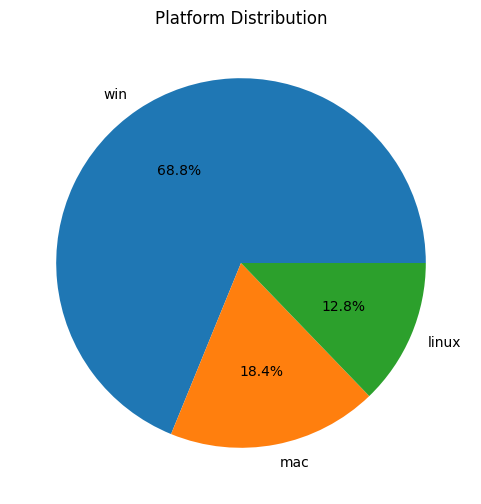

In [19]:
platform_counts = df[['win', 'mac', 'linux']].sum()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%')
plt.title('Platform Distribution')
plt.show()

In [20]:
df.groupby('win')[['positive_ratio','user_reviews', 'price_final','price_original','discount']].mean().round(2)

,positive_ratio,user_reviews,price_final,price_original,discount
win,,,,,
False,92.10,108.5,5.13,5.33,3.69
True,76.86,1467.6,6.65,7.16,5.77


In [21]:
df.groupby('mac')[['positive_ratio','user_reviews', 'price_final','price_original','discount']].mean().round(2)


,positive_ratio,user_reviews,price_final,price_original,discount
mac,,,,,
False,76.28,966.24,6.48,7.00,6.15
True,79.45,2789.21,7.06,7.49,4.57


In [22]:
df.groupby('linux')[['positive_ratio','user_reviews', 'price_final','price_original','discount']].mean().round(2)

,positive_ratio,user_reviews,price_final,price_original,discount
linux,,,,,
False,76.48,1026.48,6.57,7.07,5.89
True,79.90,3316.36,6.91,7.40,5.05


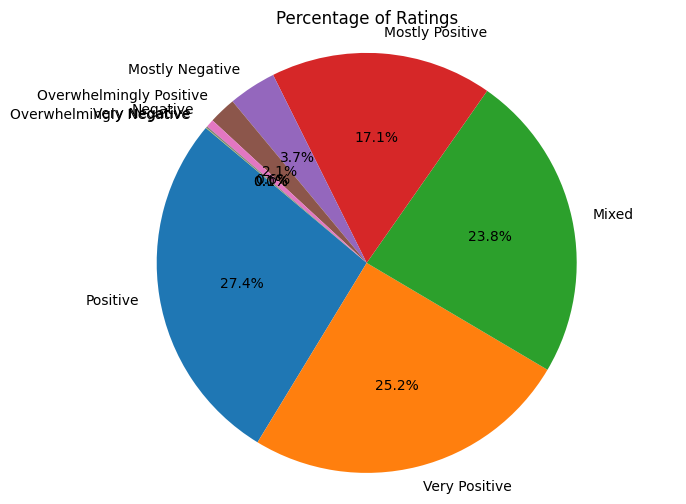

In [23]:
rating_percentage = df['rating'].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(rating_percentage, labels=rating_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Ratings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

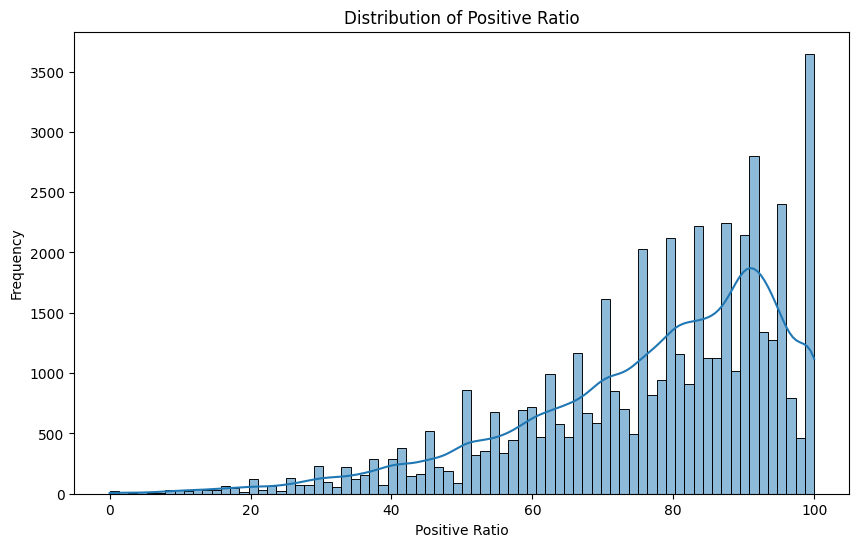

In [24]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['positive_ratio'], kde=True)
plt.xlabel('Positive Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Positive Ratio')
plt.show()

Series Size  441
Average Common Genres  1268.6575963718822


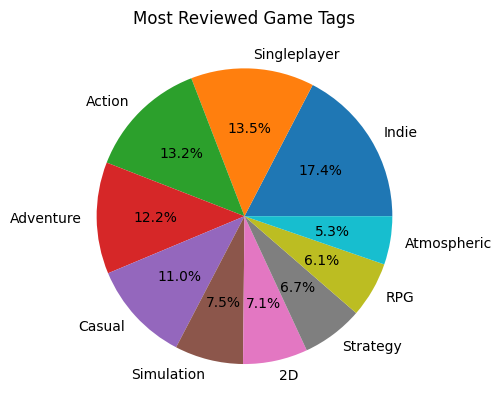

In [25]:
genres = df['tags']
count_list = []
for i in genres:
    for j in i:
        count_list.append(j)

sorted_genres = pd.value_counts(np.array(count_list))
sorted_genres = sorted_genres.sort_values(ascending=False)
print("Series Size ", sorted_genres.size)
print("Average Common Genres ", sorted_genres.mean())

# Create a chart to help us see our results
genre_slice = sorted_genres.head(10)
labels = genre_slice.keys()

fig, ax = plt.subplots()
plt.title('Most Reviewed Game Tags')
pchart = ax.pie(genre_slice, labels = labels, autopct='%1.1f%%')

Series Size  62
Average Common Genres  1.467741935483871


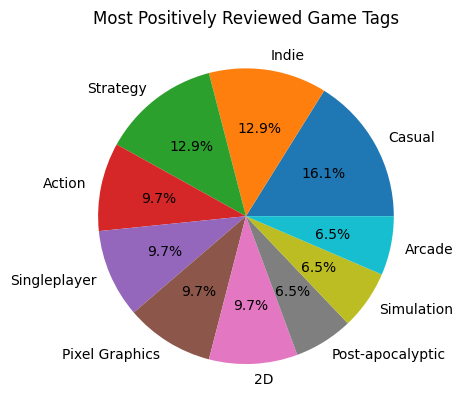

In [26]:
positive_games = df.sort_values('positive_ratio', ascending=False)
positivedf = positive_games.head(10)
tags = positivedf['tags']
count_list = []
for i in tags:
    for j in i:
        count_list.append(j)

sorted_tags = pd.value_counts(np.array(count_list))
sorted_tags = sorted_tags.sort_values(ascending=False)
print("Series Size ", sorted_tags.size)
print("Average Common Genres ", sorted_tags.mean())  

# Create a chart to help us see our results
tag_slice = sorted_tags.head(10)
labels = tag_slice.keys()

fig, ax = plt.subplots()
plt.title('Most Positively Reviewed Game Tags')
pchart = ax.pie(tag_slice, labels = labels, autopct='%1.1f%%')

In [27]:
numeric_columns = ['user_reviews', 'price_final', 'price_original', 'discount']

# Calculate correlation with positive_ratio
correlation = df[numeric_columns + ['positive_ratio']].corr()['positive_ratio']

print("Correlation with positive_ratio:")
print(correlation)

Correlation with positive_ratio:
user_reviews      0.017682
price_final       0.022153
price_original    0.026833
discount          0.000991
positive_ratio    1.000000
Name: positive_ratio, dtype: float64


transfer bool columns into int columns.    
Use 1 replace True.  0 replace False     

In [28]:
#df['win'] = df1['win'].astype(int)
#df['mac'] = df1['mac'].astype(int)
#df['linux'] = df1['linux'].astype(int)
#df['steam_deck'] = df1['steam_deck'].astype(int)

In [29]:
def map_rating(rating):
    positive_ratings = ['Overwhelmingly Positive', 'Positive', 'Very Positive', 'Mostly Positive']
    return 1 if rating in positive_ratings else 0

# Add the new column 'positive_or_not'
df['positive_or_not'] = df['rating'].apply(map_rating)

In [30]:
df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,tags,positive_or_not
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,"[Action, Adventure, Parkour, Third Person, Gre...",1
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True,[Action],1
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St...",1
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,"[Zombies, Adventure, Survival, Action, Third P...",0
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,"[Roguelike, Strategy, Tower Defense, Pixel Gra...",1


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline

   app_id                              title date_release   win    mac  linux  \
0   13500  Prince of Persia: Warrior Within™   2008-11-21  True  False  False   
1   22364            BRINK: Agents of Change   2011-08-03  True  False  False   
2  113020       Monaco: What's Yours Is Mine   2013-04-24  True   True   True   
3  226560                 Escape Dead Island   2014-11-18  True  False  False   
4  249050            Dungeon of the ENDLESS™   2014-10-27  True   True  False   

          rating  positive_ratio  user_reviews  price_final  price_original  \
0  Very Positive              84          2199         9.99            9.99   
1       Positive              85            21         2.99            2.99   
2  Very Positive              92          3722        14.99           14.99   
3          Mixed              61           873        14.99           14.99   
4  Very Positive              88          8784        11.99           11.99   

   discount  steam_deck               

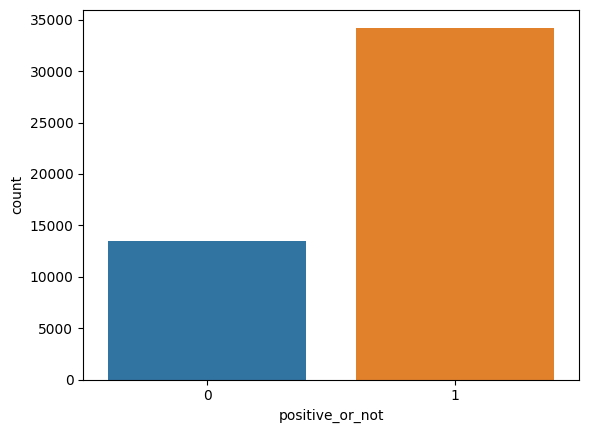

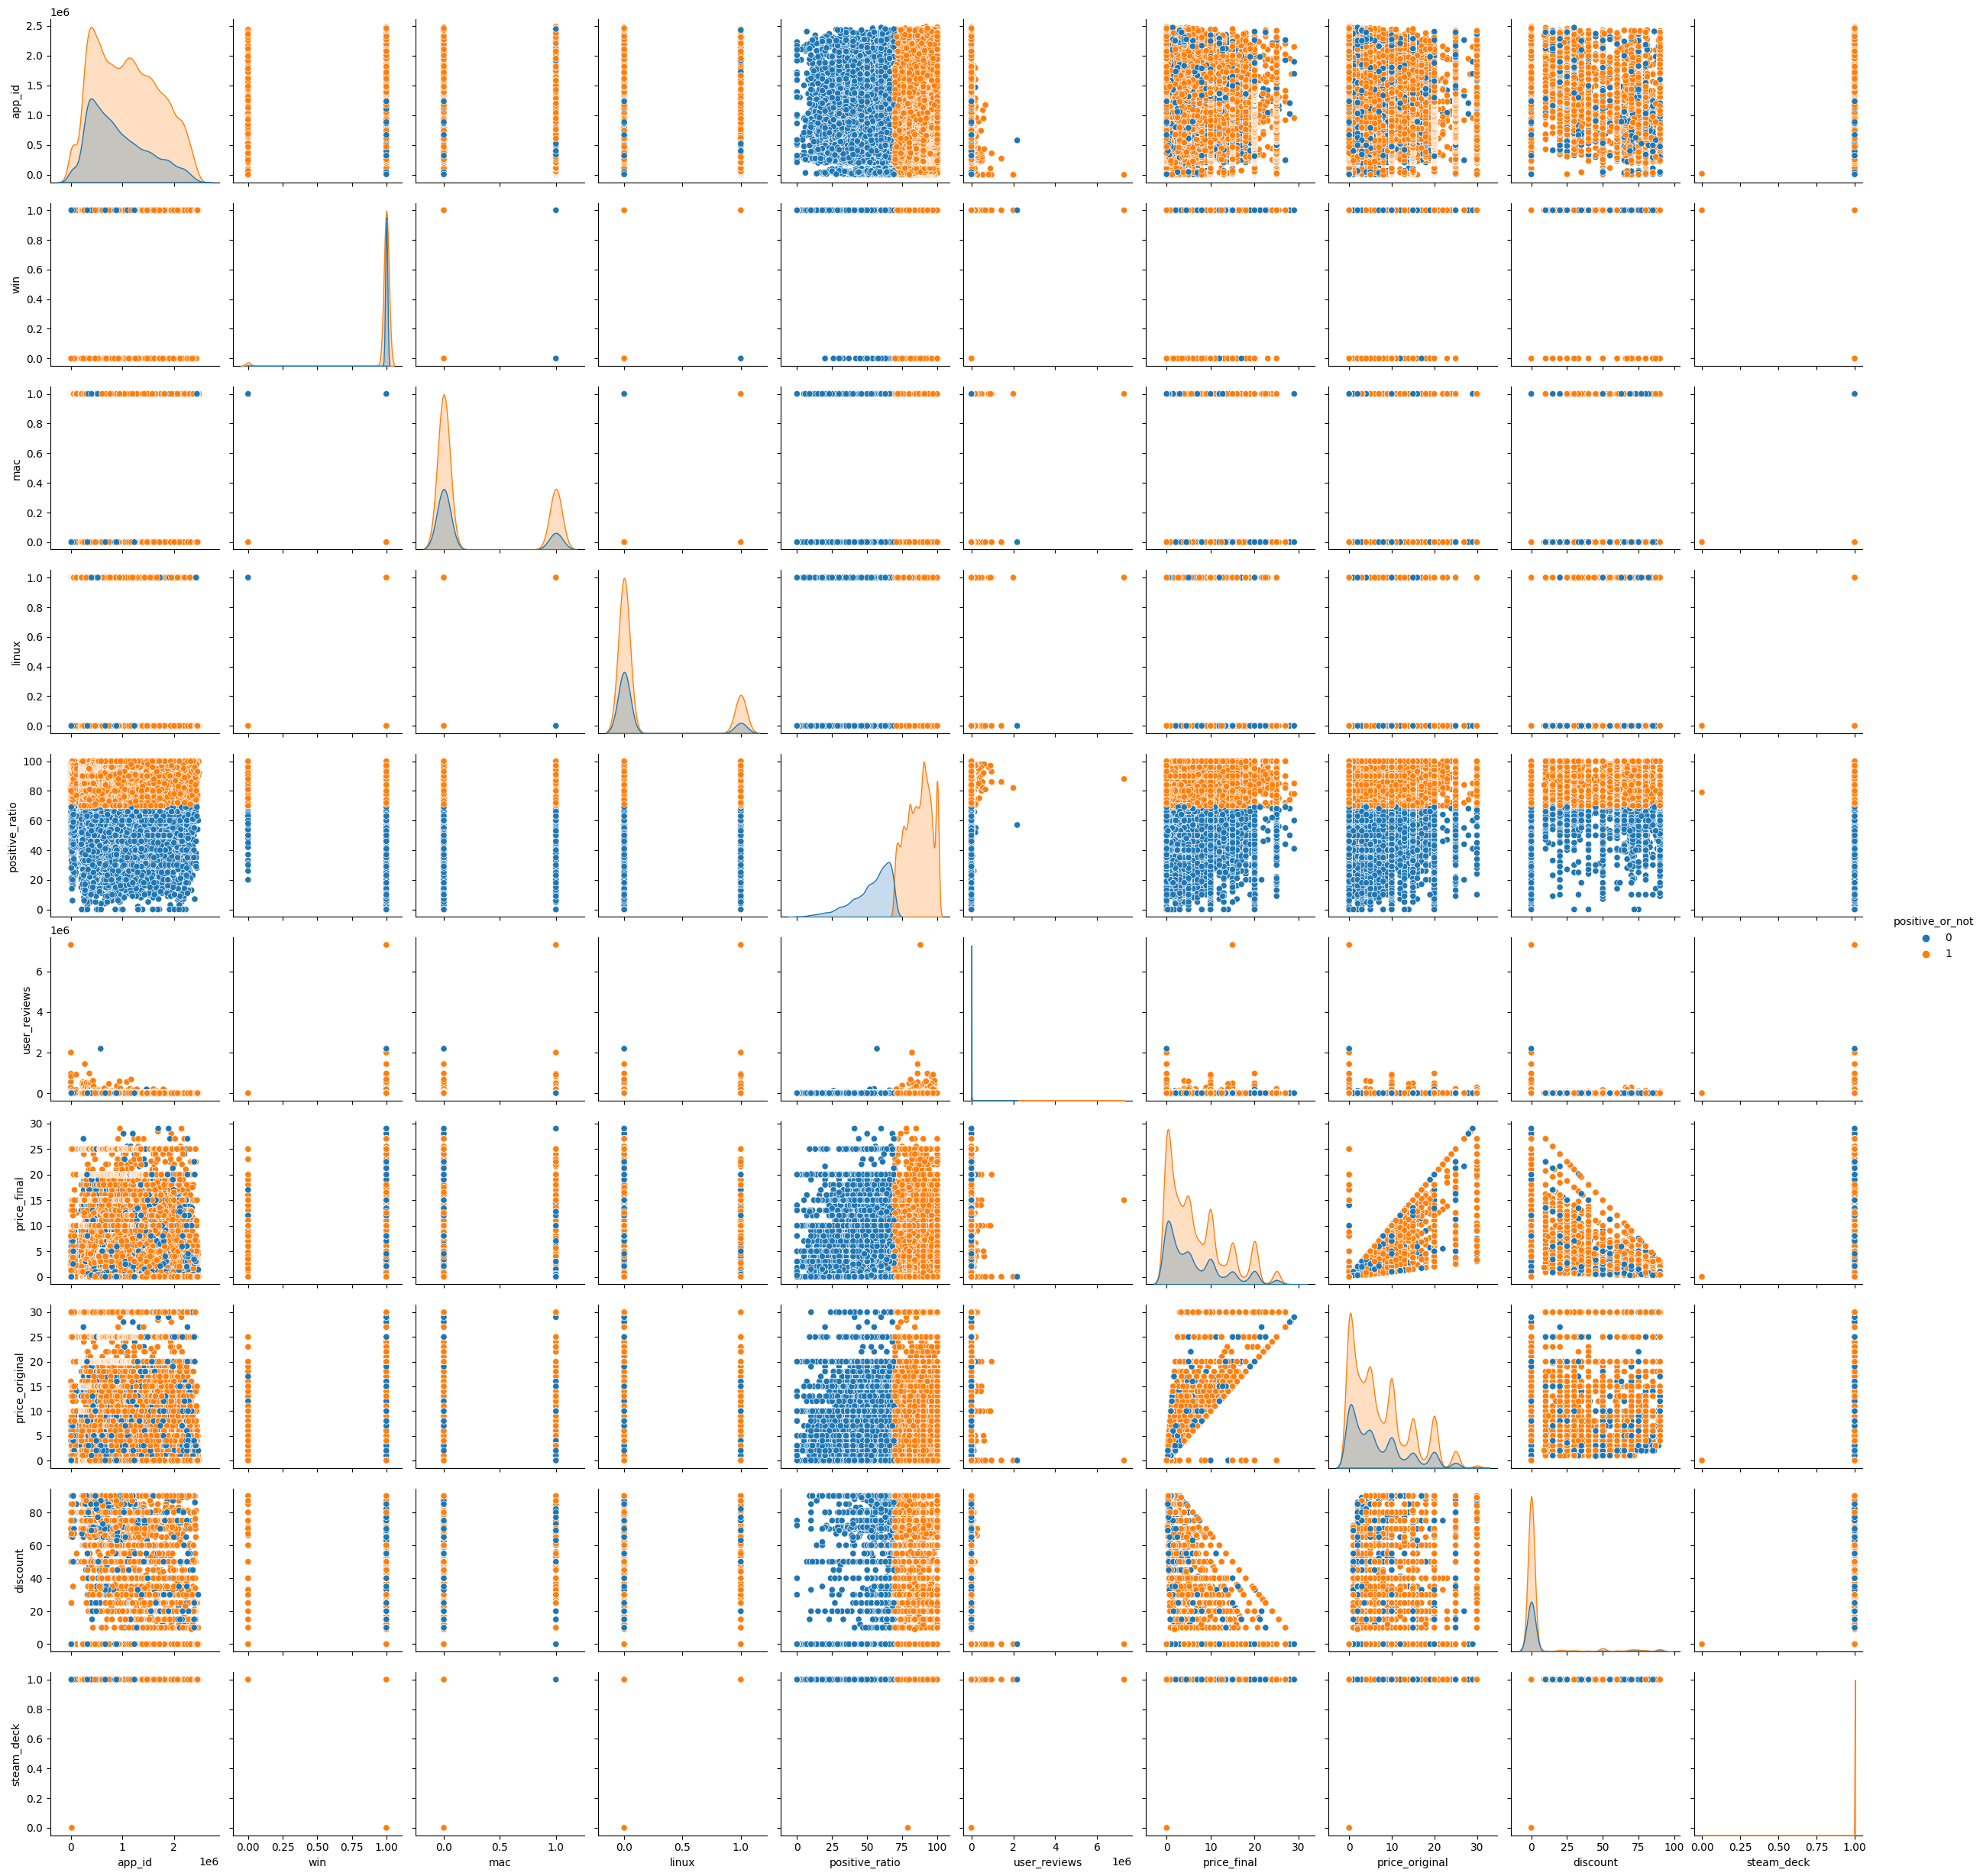

In [43]:
# Print the first few rows of the dataframe
print(df.head())

# Display the distribution of 'Survived'
sns.countplot(x='positive_or_not', data=df)
plt.show()

# More detailed exploration
sns.pairplot(df, hue='positive_or_not')
plt.show()

In [32]:
df.columns.to_list()
# len(df.columns.to_list())

['app_id',
 'title',
 'date_release',
 'win',
 'mac',
 'linux',
 'rating',
 'positive_ratio',
 'user_reviews',
 'price_final',
 'price_original',
 'discount',
 'steam_deck',
 'tags',
 'positive_or_not']

In [33]:
cat_columns = ['win','mac','linux']
num_columns = ['user_reviews', 'price_final', 'price_original', 'discount']
target = 'positive_or_not'

In [34]:
# build pipeline
cat_transformer = OneHotEncoder()
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [35]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df[cat_columns + num_columns], df[target], test_size=0.2, random_state=42)

In [36]:
X_train.shape

(38154, 7)

In [37]:
X_test.shape

(9539, 7)

In [38]:
accuracies = []

for a in range(1,100):
        
    knn = KNeighborsClassifier(n_neighbors = a)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f1_score(y_pred, y_test))
    accuracies.append(accuracy_score(y_pred, y_test))

0.7318237719742459
0.6166242578456319
0.7585630743525481
0.7067555286276885
0.7822222222222222
0.7471288964976103
0.7934135696336464
0.7676572218382861
0.8036993617298425
0.7862662097695357
0.810344827586207
0.7941798941798942
0.8130226619853177
0.8027911829920439
0.8189295204352778
0.8105330764290302
0.8216039279869066
0.816019386518717
0.8233231039017975
0.8171196342392685
0.8242803504380476
0.8196845425867508
0.8252778818533782
0.8220712218447214
0.8264205077028629
0.8250469630557296
0.82829413960433
0.8254584141685963
0.8282589785013048
0.8253174057164301
0.8293106657566546
0.8277151224375351
0.8307711381105877
0.8286763333125895
0.8305504019789735
0.8292501395521925
0.8303311668214175
0.8293924160615652
0.8312105848893285
0.8290561113527621
0.831467623229637
0.8303267001425826
0.8316244595429279
0.8299547455210465
0.8316036570298987
0.8299690402476779
0.8313082094615432
0.8310146540530514
0.833650832667609
0.8333640893153719
0.8340498710232158
0.8327073456067976
0.8338249754178958

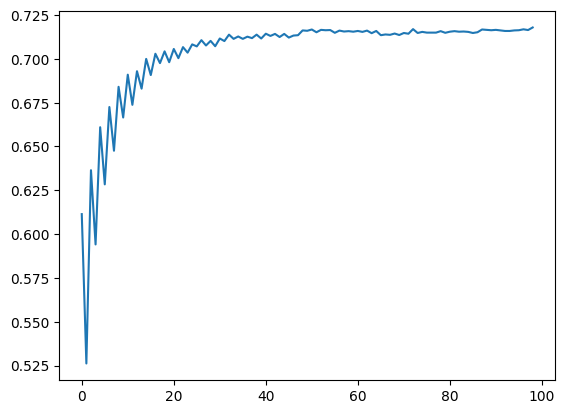

In [39]:
plt.plot(accuracies)

In [40]:
# Hyperparameter tuning
# select parameters
params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
params_knn = {'n_neighbors': list(range(1,100)), 'weights': ['uniform', 'distance']}

# Define the models
nb = GaussianNB()
knn = KNeighborsClassifier()

# Define GridSearchCV
gridsearch_nb = GridSearchCV(nb, params_nb, cv=5, scoring='roc_auc')
    #nb, params_nb, cv=5)
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=10, scoring='roc_auc')

# Fit models
gridsearch_nb.fit(X_train, y_train)
randomsearch_knn.fit(X_train, y_train)

# Get the best parameters
print("Best parameters for Naive Bayes: ", gridsearch_nb.best_params_)
print("Best parameters for KNN: ", randomsearch_knn.best_params_)

Best parameters for Naive Bayes:  {'var_smoothing': 1.0}
Best parameters for KNN:  {'weights': 'uniform', 'n_neighbors': 97}


In [41]:
# Apply the best parameters
nb_best = GaussianNB(**gridsearch_nb.best_params_)
knn_best = KNeighborsClassifier(**randomsearch_knn.best_params_)

# Perform cross-validation
cv_scores_nb = cross_val_score(nb_best, X_train, y_train, cv=5, scoring='roc_auc')
cv_scores_knn = cross_val_score(knn_best, X_train, y_train, cv=5, scoring='roc_auc')

print("Cross-validation scores for Naive Bayes: ", cv_scores_nb)
print("Cross-validation scores for KNN: ", cv_scores_knn)

# Fit the models with the best parameters
nb_best.fit(X_train, y_train)
knn_best.fit(X_train, y_train)

# Evaluate on the test set
y_pred_nb = nb_best.predict(X_test)
y_pred_knn = knn_best.predict(X_test)

print("Test accuracy for Naive Bayes: ", accuracy_score(y_test, y_pred_nb))
print("Test accuracy for KNN: ", accuracy_score(y_test, y_pred_knn))

Cross-validation scores for Naive Bayes:  [0.56836904 0.56274777 0.55558967 0.56282609 0.56342781]
Cross-validation scores for KNN:  [0.59210783 0.58305309 0.59188248 0.59075948 0.59013515]
Test accuracy for Naive Bayes:  0.7193626166264807
Test accuracy for KNN:  0.716846629625747


In [42]:
# Compute metrics
print("Naive Bayes Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_nb))
print("Accuracy: ", accuracy_score(y_test, y_pred_nb))
print("Precision: ", precision_score(y_test, y_pred_nb))
print("Recall: ", recall_score(y_test, y_pred_nb))
print("F1 Score: ", f1_score(y_test, y_pred_nb))

print("\nK-Nearest Neighbors Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_knn))
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Precision: ", precision_score(y_test, y_pred_knn))
print("Recall: ", recall_score(y_test, y_pred_knn))
print("F1 Score: ", f1_score(y_test, y_pred_knn))

Naive Bayes Metrics: 
Confusion Matrix:  [[   0 2677]
 [   0 6862]]
Accuracy:  0.7193626166264807
Precision:  0.7193626166264807
Recall:  1.0
F1 Score:  0.8367782452289494

K-Nearest Neighbors Metrics: 
Confusion Matrix:  [[  19 2658]
 [  43 6819]]
Accuracy:  0.716846629625747
Precision:  0.7195314973092751
Recall:  0.9937336053628679
F1 Score:  0.8346900055082931
